# Introduction


##<h2>Title</h2>
Bank Marketing Campaign - Predict Term Deposit (deposito).

selamat datang di project saya, saya Irvan Sikajudin, seorang Data Science enthusiast, project ini berisikan beberapa proses, mulai dari Data Understanding, EDA, Deep dive EDA, Data Prepocessing, Split Data to Train data and Test Data kemudian melatih beberapa model yang dianggap cocok dgn data yang ada, menggunakan base model K-NN classification, Random Forest, dan Decession Tree., dan mentuning Random Forest.

##<h2>Context and Source</h2>

<h2>Context</h2>
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.<br>

Temukan strategi terbaik untuk ditingkatkan untuk kampanye pemasaran berikutnya. Bagaimana lembaga keuangan memiliki efektivitas yang lebih besar untuk kampanye pemasaran di masa depan? Untuk menjawab ini, kami harus menganalisis kampanye pemasaran terakhir yang dilakukan bank dan mengidentifikasi pola yang akan membantu kami menemukan kesimpulan untuk mengembangkan strategi masa depan.<br>

<h2>Source</h2>
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Dataset is about Bank campaign dataset obtained from Kaggle and licensed under CC0: Public Domain.

## Idea of The Project
The idea of ​​this project is to find out the characteristics of a campaign that can be relied on to make customers subscribe to term deposit and predict deposit

The dataset contains order-related columns, look at below for more information about columns

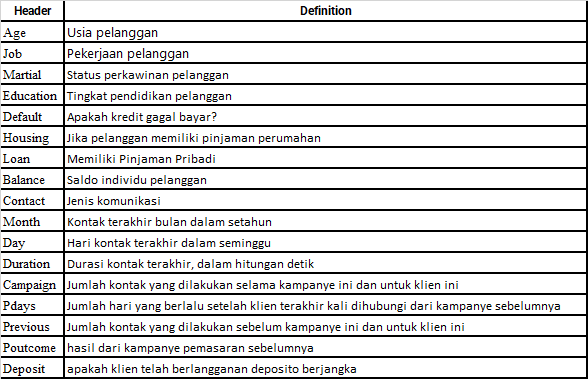

## <h2>Creative Marketing Ideas for Banks:</h2>


*   Location-Based Advertising
*   Gamification in FinTech
*   Make Customer Service Fun!
*   Highlight Success Stories
*   Social Media Personality
*   Partnerships
*   Reward Users for Engagement

# Import Library

In [ ]:

import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Collection

In [ ]:
# load data from google

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final project ds dibimbing.id/bank.csv')
datatargetiklan = df.copy()
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

In [ ]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Target (Deposit) Imbalance. lakukan SMOTE/K-Means SMOTE

# Data Understanding

## General Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<!-- **Terdapat 11162 row data dengan 17 fitur dimana saya anggap fitur deposit anggap tidak ada atau tidak memiliki target/output/label agar sesuai dengan judul project ini yakni clustering/segmentation customer,  sehingga pada kasus segmentasi ini akan menggunakan jenis Machine Learning Unsupervised - Clustering**<br> -->
**Terdapat 11162 row data dengan 17 fitur deposit adalah target/output/label **<br>

# Drop Features of Dataset

Akan mendrop fitur yang di anggap tidak perlu untuk model.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Numerical Data

In [ ]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(df.select_dtypes(include=numerics).columns)
print(df.select_dtypes(include=numerics).shape)
df_num = df.select_dtypes(include=numerics)
df_num.head(3)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

(11162, 7)


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0


**Dari 16 fitur, terdapat 7 data numerik**

## Non Numerical Data

In [ ]:
display(df.select_dtypes(include=['object']).columns)
print(df.select_dtypes(include=object).shape)
df_cat = df.select_dtypes(include=['object'])
df_cat.head(5)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

(11162, 10)


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


**Dari 17 fitur, terdapat 10 data non numerik**

# Exploratory Data Analysis (EDA)

## Statistika Deskriptif

### **data numerik**

In [ ]:
df_num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Observation :


*   95 tahun adalah usia paling tinggi, saya kira masih ada org dgn usia 95 tahun.

*   saya rasa nilai max dan min masuk akal pada semua kolom
*   ada 11162 baris data berdasarkan count, mungkin terdapat data duplikat atau missing value

*   25 % = Q1, 50 % = Q2, 75 % = Q3
*   Mean ~ 50% (Median), semua kolum tidak ada yang memiliki distribusi simetris
*   Mean > 50% (Median), semua kolum memiliki skewed distribution ke kanan/positif
*   Mean ~ 50% (Median), tidak ada kolum dgn skewed negatif/kekiri

### **data non numerik**

In [ ]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


## Univariate Analysis Categorical

### Hubungan 

In [ ]:
bal = pd.read_csv('/content/drive/MyDrive/final project ds dibimbing.id/bank.csv')
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'marital'.
bal['deposit']= label_encoder.fit_transform(bal['deposit'])
bal['deposit'].value_counts()


0    1
1    1
Name: deposit, dtype: int64

In [ ]:
bal.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1


Text(0.5, 0, '')

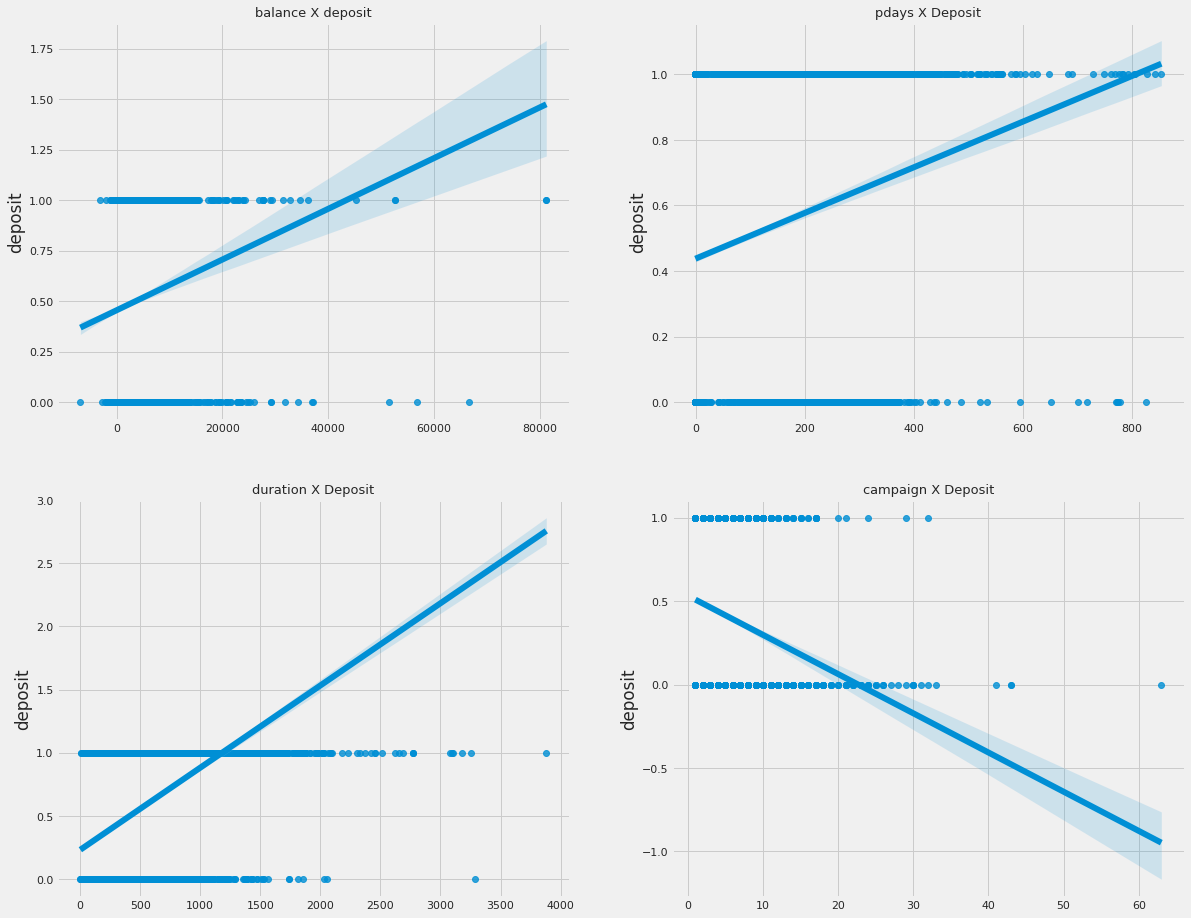

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.regplot(x="balance", y="deposit", data=bal, ax=ax[0,0])
ax[0,0].set_title('balance X deposit')
ax[0,0].set_xlabel('')

g = sns.regplot(x="pdays", y="deposit", data=bal, ax=ax[0,1])
ax[0,1].set_title('pdays X Deposit')
ax[0,1].set_xlabel('')

g = sns.regplot(x="duration", y="deposit", data=bal, ax=ax[1,0])
ax[1,0].set_title('duration X Deposit')
ax[1,0].set_xlabel('')

g = sns.regplot(x="campaign", y="deposit", data=bal, ax=ax[1,1])
ax[1,1].set_title('campaign X Deposit')
ax[1,1].set_xlabel('')

untuk visualisasi terbaik akan membuat boxplot lagi dibawah ini

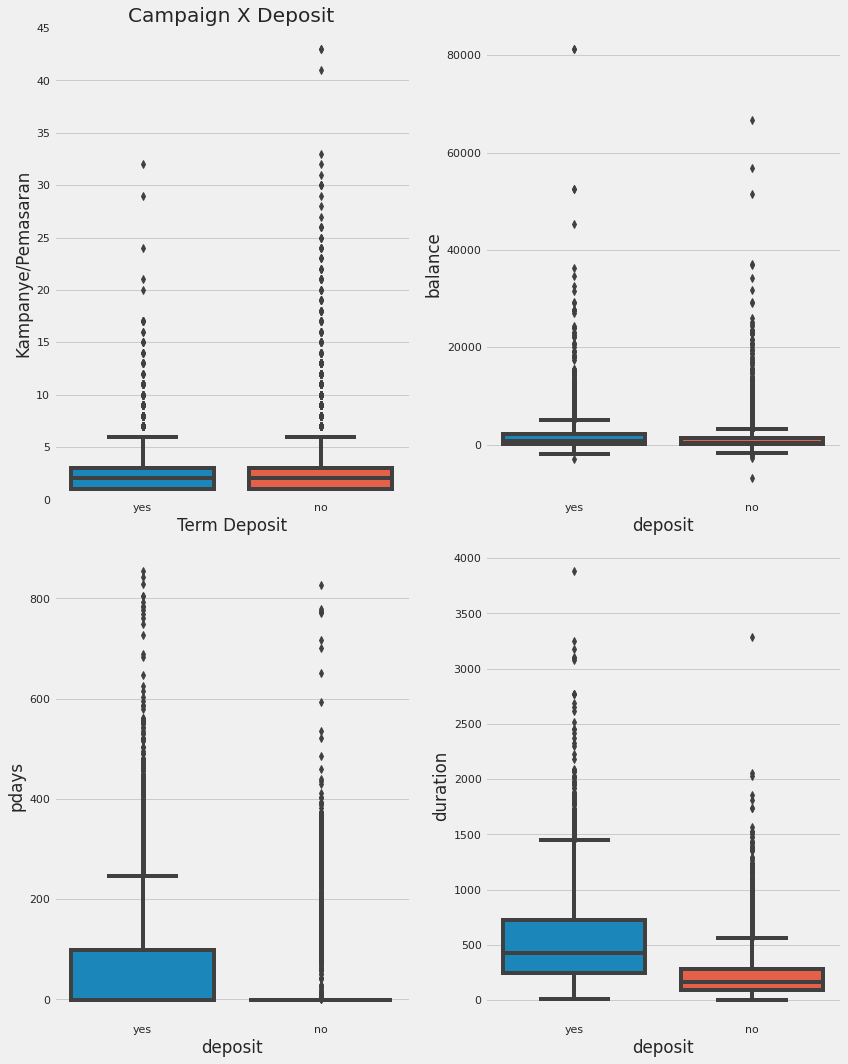

In [ ]:
f,ax = plt.subplots(2,2,figsize=(12,15))

g = sns.boxplot(x="deposit", y="campaign",data=df, ax=ax[0,0])
g = sns.boxplot(x="deposit", y="balance",data=df, ax=ax[0,1])
g = sns.boxplot(x="deposit", y="pdays",data=df, ax=ax[1,0])
g = sns.boxplot(x="deposit", y="duration",data=df, ax=ax[1,1])

ax[0,0].set_ylim(0, 45)
# ax[0,0].set_xlim(0, 45)
ax[0,0].set_ylabel('Kampanye/Pemasaran')
ax[0,0].set_xlabel('Term Deposit')
ax[0,0].set_title('Campaign X Deposit')


plt.tight_layout()

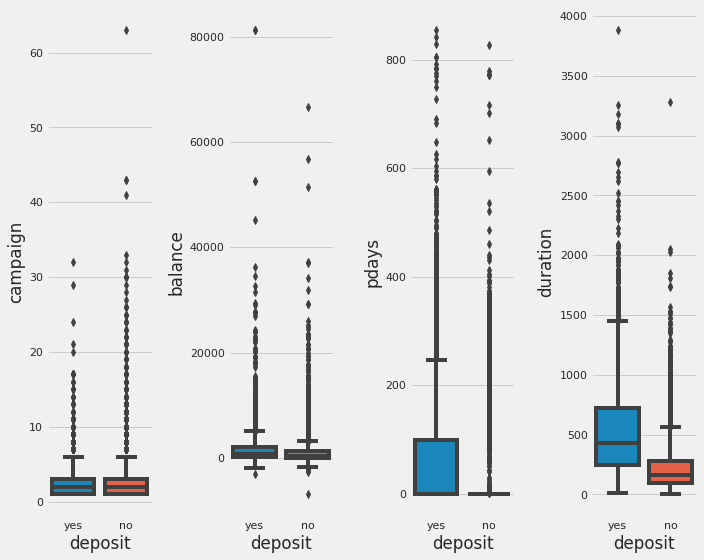

In [ ]:
f,ax = plt.subplots(1,4, figsize=(10,8))

g = sns.boxplot(x="deposit", y="campaign",data=df, ax=ax[0])
g = sns.boxplot(x="deposit", y="balance",data=df, ax=ax[1])
g = sns.boxplot(x="deposit", y="pdays",data=df, ax=ax[2])
g = sns.boxplot(x="deposit", y="duration",data=df, ax=ax[3])

# ax[0].set_ylim(0, 45)
# ax[0,0].set_xlim(0, 45)
# ax[0].set_ylabel('Kampanye/Pemasaran')
# ax[0].set_xlabel('Term Deposit')
# ax[0].set_title('Campaign X Deposit')


plt.tight_layout()

semakin banyak saldo pelanggan di rekening semakin besar peluang juga untuk di alihkan menjadi deposito, sedangkan setelah campaign dilakukan ke pelanggan akan memerlukan waktu yg agak lama untuk melakukan deposito jika campaign berhasil, campaign harapnya dilakukan dengan sewajarnya dan secukupnya, karna jika terlalu berlebihan dapat menurunkan kemungkinan pelanggan untuk deposito.  

### mengetahui Frequensi/frekuensi

In [ ]:
rows = []
for col in df_cat :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Unique Values':  df[col].unique()

        }
  )
# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)


,Nama Kolom,Jumlah Unique Values,Unique Values
0,job,12,"[admin., technician, services, management, retired, blue-collar, u..."
1,month,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep]"
2,education,4,"[secondary, tertiary, primary, unknown]"
3,poutcome,4,"[unknown, other, failure, success]"
4,marital,3,"[married, single, divorced]"
5,contact,3,"[unknown, cellular, telephone]"
6,default,2,"[no, yes]"
7,housing,2,"[yes, no]"
8,loan,2,"[no, yes]"
9,deposit,2,"[yes, no]"


kolom job dan month memiliki values kategori terbanyak.

In [ ]:
job = df['job'].value_counts().reset_index()
job.columns = ['job', 'FREQ']
job['PERCENTAGE'] = round((job['FREQ']/job['FREQ'].sum())*100,2)
job = job[0:5]
job.head(10)

,job,FREQ,PERCENTAGE
0,management,2566,22.99
1,blue-collar,1944,17.42
2,technician,1823,16.33
3,admin.,1334,11.95
4,services,923,8.27


In [ ]:
marital = df['marital'].value_counts().reset_index()
marital.columns = ['marital', 'FREQ']
marital['PERCENTAGE'] = round((marital['FREQ']/marital['FREQ'].sum())*100,2)
marital = marital[0:10]
marital.head(3)

,marital,FREQ,PERCENTAGE
0,married,6351,56.90
1,single,3518,31.52
2,divorced,1293,11.58


In [ ]:
education = df['education'].value_counts().reset_index()
education.columns = ['education', 'FREQ']
education['PERCENTAGE'] = round((education['FREQ']/education['FREQ'].sum())*100,2)
education = education[0:10]
education.head(5)

,education,FREQ,PERCENTAGE
0,secondary,5476,49.06
1,tertiary,3689,33.05
2,primary,1500,13.44
3,unknown,497,4.45


In [ ]:
default = df['default'].value_counts().reset_index()
default.columns = ['default', 'FREQ']
default['PERCENTAGE'] = round((default['FREQ']/default['FREQ'].sum())*100,2)
default = default[0:10]
default.head(5)

,default,FREQ,PERCENTAGE
0,no,10994,98.49
1,yes,168,1.51


In [ ]:
housing = df['housing'].value_counts().reset_index()
housing.columns = ['housing', 'FREQ']
housing['PERCENTAGE'] = round((housing['FREQ']/housing['FREQ'].sum())*100,2)
housing = housing[0:10]
housing.head(5)

,housing,FREQ,PERCENTAGE
0,no,5881,52.69
1,yes,5281,47.31


In [ ]:
loan = df['loan'].value_counts().reset_index()
loan.columns = ['loan', 'FREQ']
loan['PERCENTAGE'] = round((loan['FREQ']/loan['FREQ'].sum())*100,2)
loan = loan[0:10]
loan.head(5)

,loan,FREQ,PERCENTAGE
0,no,9702,86.92
1,yes,1460,13.08


In [ ]:
contact = df['contact'].value_counts().reset_index()
contact.columns = ['contact', 'FREQ']
contact['PERCENTAGE'] = round((contact['FREQ']/contact['FREQ'].sum())*100,2)
contact = contact[0:10]
contact.head(5)

,contact,FREQ,PERCENTAGE
0,cellular,8042,72.05
1,unknown,2346,21.02
2,telephone,774,6.93


In [ ]:
poutcome = df['poutcome'].value_counts().reset_index()
poutcome.columns = ['poutcome', 'FREQ']
poutcome['PERCENTAGE'] = round((poutcome['FREQ']/poutcome['FREQ'].sum())*100,2)
poutcome = poutcome[0:10]
poutcome.head(5)

,poutcome,FREQ,PERCENTAGE
0,unknown,8326,74.59
1,failure,1228,11.00
2,success,1071,9.60
3,other,537,4.81


In [ ]:
deposit = df['deposit'].value_counts().reset_index()
deposit.columns = ['deposit', 'FREQ']
deposit['PERCENTAGE'] = round((deposit['FREQ']/deposit['FREQ'].sum())*100,2)
deposit = deposit[0:10]
deposit.head(5)

,deposit,FREQ,PERCENTAGE
0,no,5873,52.62
1,yes,5289,47.38


In [ ]:
month = df['month'].value_counts().reset_index()
month.columns = ['month', 'FREQ']
month['PERCENTAGE'] = round((month['FREQ']/month['FREQ'].sum())*100,2)
month = month[0:10]
month.head(5)

,month,FREQ,PERCENTAGE
0,may,2824,25.30
1,aug,1519,13.61
2,jul,1514,13.56
3,jun,1222,10.95
4,nov,943,8.45


In [ ]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

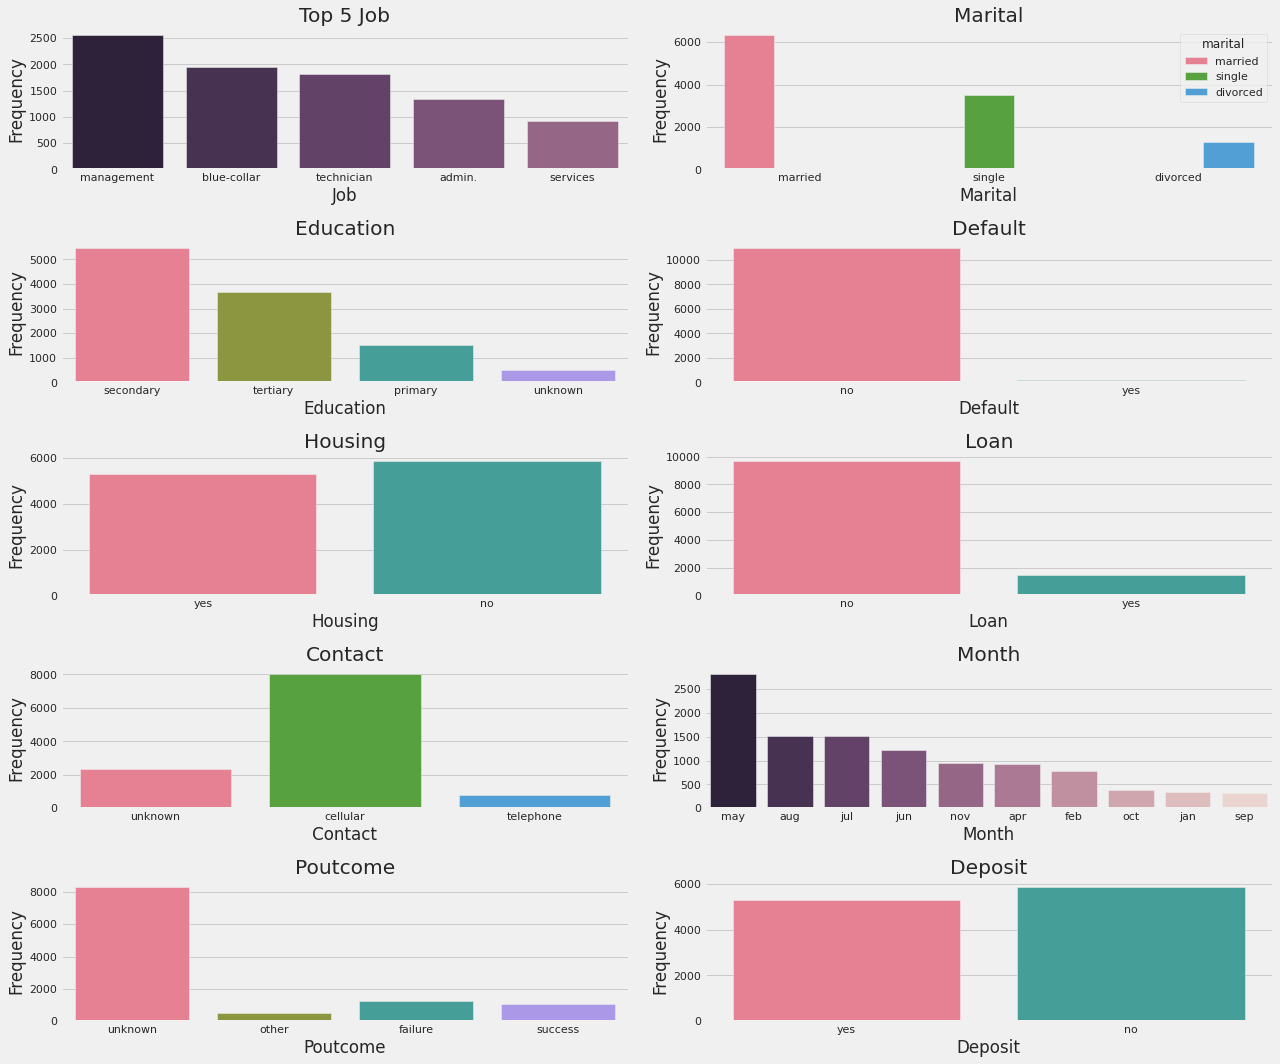

In [ ]:
# cat_feature = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'deposit']
cat_feature = df_cat.columns

f,ax = plt.subplots(5,2,figsize=(18,15))


g = sns.barplot(x='job', y ='FREQ', data=job, ax=ax[0,0], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
ax[0,0].set_title('Top 5 Job')
ax[0,0].set_xlabel('Job')
ax[0,0].set_ylabel('Frequency')

g = sns.countplot('marital',data=df, hue = 'marital', palette='husl', ax=ax[0,1])
ax[0,1].set_title('Marital')
ax[0,1].set_xlabel('Marital')
ax[0,1].set_ylabel('Frequency')

g = sns.countplot('education',data=df,palette='husl', ax=ax[1,0])
ax[1,0].set_title('Education')
ax[1,0].set_xlabel('Education')
ax[1,0].set_ylabel('Frequency')

# g = sns.barplot(x='default', y ='FREQ', data=default, ax=ax[1,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
g = sns.countplot('default',data=df,palette='husl', ax=ax[1,1])
ax[1,1].set_title('Default')
ax[1,1].set_xlabel('Default')
ax[1,1].set_ylabel('Frequency')

g = sns.countplot('housing',data=df,palette='husl', ax=ax[2,0])
ax[2,0].set_title('Housing')
ax[2,0].set_xlabel('Housing')
ax[2,0].set_ylabel('Frequency')

g = sns.countplot('loan',data=df,palette='husl', ax=ax[2,1])
ax[2,1].set_title('Loan')
ax[2,1].set_xlabel('Loan')
ax[2,1].set_ylabel('Frequency')

g = sns.countplot('contact',data=df,palette='husl', ax=ax[3,0])
ax[3,0].set_title('Contact')
ax[3,0].set_xlabel('Contact')
ax[3,0].set_ylabel('Frequency')

g = sns.barplot(x='month', y ='FREQ', data=month, ax=ax[3,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
# g = sns.countplot('month',data=df,palette='husl', ax=ax[3,1])
ax[3,1].set_title('Month')
ax[3,1].set_xlabel('Month')
ax[3,1].set_ylabel('Frequency')

g = sns.countplot('poutcome',data=df,palette='husl', ax=ax[4,0])
ax[4,0].set_title('Poutcome')
ax[4,0].set_xlabel('Poutcome')
ax[4,0].set_ylabel('Frequency')

g = sns.countplot('deposit',data=df,palette='husl', ax=ax[4,1])
ax[4,1].set_title('Deposit')
ax[4,1].set_xlabel('Deposit')
ax[4,1].set_ylabel('Frequency')


plt.tight_layout()

In [ ]:
df_cat.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes


### mengetahui jumlah orang yang melakukan deposit pada tiap fitur

In [ ]:
df_cat2 = df_cat.copy()
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'marital'.
df_cat2['deposit']= label_encoder.fit_transform(df_cat2['deposit'])
df_cat2['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [ ]:
df_cat2.head(2)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,1
1,admin.,married,secondary,no,no,no,unknown,may,unknown,1


In [ ]:
# df = df_cat2

# sns.barplot( x='job', y='deposit', hue='loan', data=df , palette='Reds' )
# plt.show()

In [ ]:
df_cat2.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

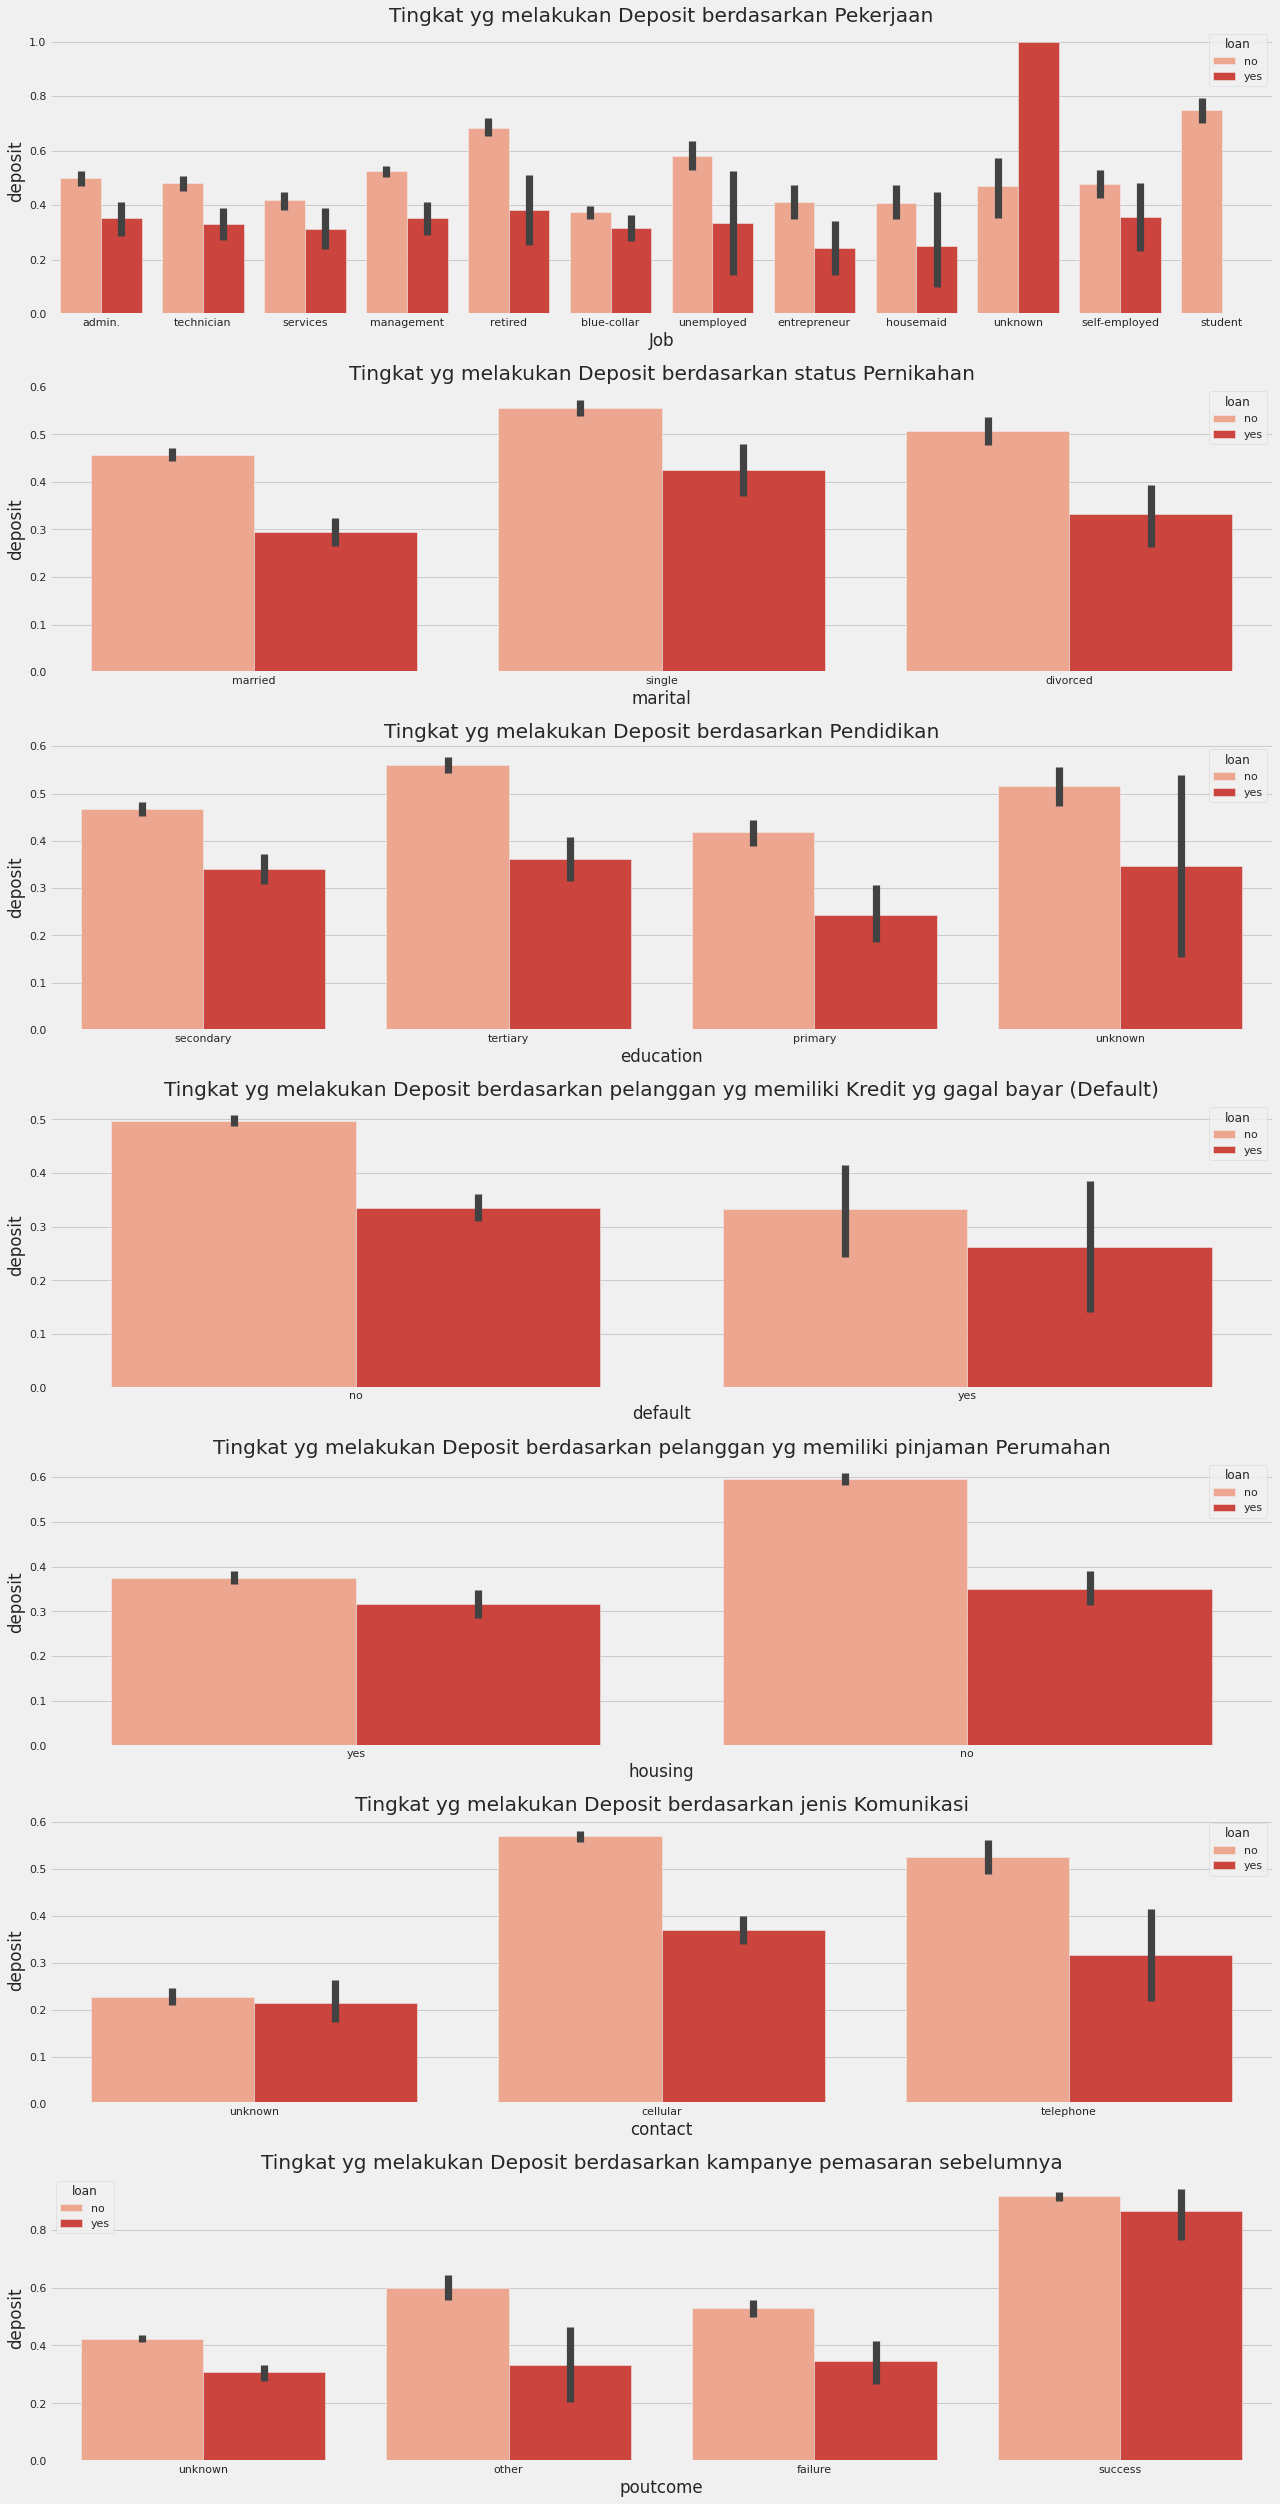

In [ ]:
# cat_feature = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome', 'deposit']
cat_feature = df_cat2.columns

f,ax = plt.subplots(7,figsize=(18,35))

g = sns.barplot(x='job', y='deposit', hue='loan', data=df_cat2 , palette='Reds' ,ax=ax[0])
ax[0].set_title('Tingkat yg melakukan Deposit berdasarkan Pekerjaan')
ax[0].set_xlabel('Job')
ax[0].set_ylabel('deposit')

g = sns.barplot(x='marital', y='deposit', hue='loan', data=df_cat2 , palette='Reds' ,ax=ax[1])
ax[1].set_title('Tingkat yg melakukan Deposit berdasarkan status Pernikahan')
ax[1].set_xlabel('marital')
ax[1].set_ylabel('deposit')

g = sns.barplot(x='education', y='deposit', hue='loan', data=df_cat2 , palette='Reds' ,ax=ax[2])
ax[2].set_title('Tingkat yg melakukan Deposit berdasarkan Pendidikan')
ax[2].set_xlabel('education')
ax[2].set_ylabel('deposit')

g = sns.barplot(x='default', y='deposit', hue='loan', data=df_cat2 , palette='Reds' ,ax=ax[3])
ax[3].set_title('Tingkat yg melakukan Deposit berdasarkan pelanggan yg memiliki Kredit yg gagal bayar (Default)')
ax[3].set_xlabel('default')
ax[3].set_ylabel('deposit')

g = sns.barplot(x='housing', y='deposit', hue='loan', data=df_cat2 , palette='Reds' ,ax=ax[4])
ax[4].set_title('Tingkat yg melakukan Deposit berdasarkan pelanggan yg memiliki pinjaman Perumahan')
ax[4].set_xlabel('housing')
ax[4].set_ylabel('deposit')

g = sns.barplot(x='contact', y='deposit', hue='loan', data=df_cat2 , palette='Reds' ,ax=ax[5])
ax[5].set_title('Tingkat yg melakukan Deposit berdasarkan jenis Komunikasi')
ax[5].set_xlabel('contact')
ax[5].set_ylabel('deposit')

g = sns.barplot(x='poutcome', y='deposit', hue='loan', data=df_cat2 , palette='Reds' ,ax=ax[6])
ax[6].set_title('Tingkat yg melakukan Deposit berdasarkan kampanye pemasaran sebelumnya')
ax[6].set_xlabel('poutcome')
ax[6].set_ylabel('deposit')


plt.tight_layout()

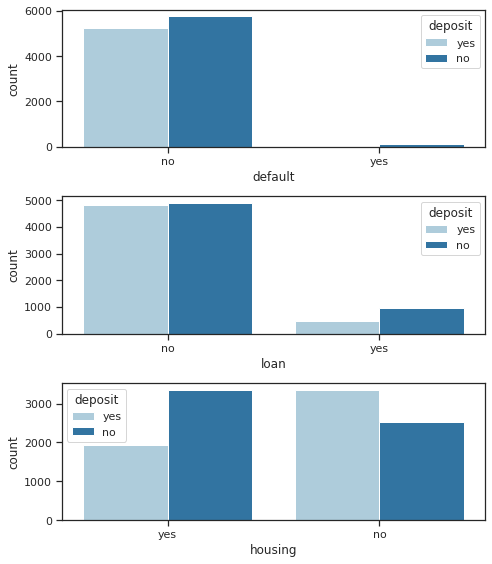

In [ ]:
f,ax = plt.subplots(3,figsize=(7,8))
# d = df.loc[(df['default'] == 'yes') & (df['loan'] == 'yes') & (df['housing'] == 'yes')]
d = df


g = sns.countplot(x="default", hue="deposit", data=d , palette='Paired' ,ax=ax[0])
# ax[0].set_title('Count of Default X Deposit')

g = sns.countplot(x="loan", hue="deposit", data=d , palette='Paired' ,ax=ax[1])
# ax[1].set_title('Count of Loan X Deposit')

g = sns.countplot(x="housing", hue="deposit", data=d , palette='Paired' ,ax=ax[2])
# ax[2].set_title('Count of Loan X Deposit')


plt.tight_layout()

# g = sns.countplot(x="default", hue="deposit", data=df)

karena tampilannya kurang bagus, dan pada yang memiliki loan dan default tidak begitu terlihat maka akan di buat lagi khusus untuk hal tersebut agar terlihat lebih baik.

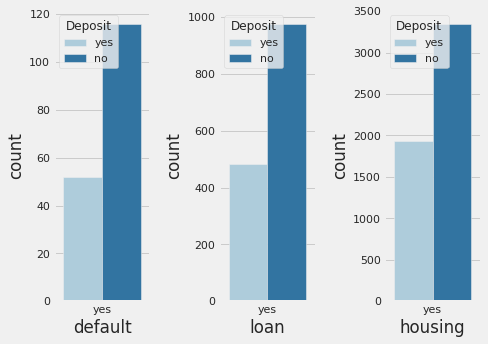

In [ ]:
f,ax = plt.subplots(1,3,figsize=(7,5))

d = df.loc[(df['default'] == 'yes')]
l = df.loc[(df['loan'] == 'yes')]
h = df.loc[(df['housing'] == 'yes')]


g = sns.countplot(x="default", hue="deposit", data=d , palette='Paired' ,ax=ax[0])
g = sns.countplot(x="loan", hue="deposit", data=l , palette='Paired' ,ax=ax[1])
g = sns.countplot(x="housing", hue="deposit", data=h , palette='Paired' ,ax=ax[2])

ax[0].legend(loc='upper left', title='Deposit')
ax[1].legend(loc='upper left', title='Deposit')
ax[2].legend(loc='upper left', title='Deposit')
# ax[0].set_title('Count of Default X Deposit')
# ax[1].set_title('Count of Loan X Deposit')
# ax[1].set_title('Count of Housing X Deposit')
plt.tight_layout()



## Univariate Analysis Numeric

### Box Plot

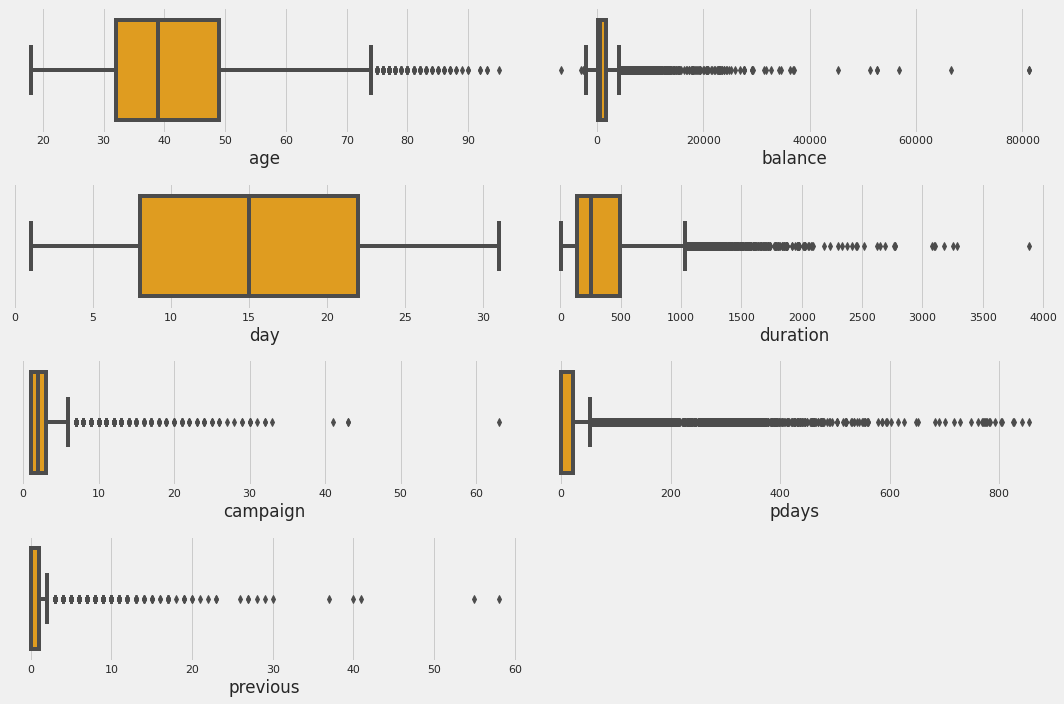

In [ ]:
# boxplot visualization for numerical data

numericals = df_num.columns

plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[numericals[i]], color='orange')
    plt.tight_layout()

plt.show()

Dari pengamatan plot kotak/box plot:

Pada beberapa literatur dijelaskan bahwa outliers akan berpengaruh pada klasifikasi, dengan mengolah outlier(dihapus/metode lainnya) akan meningkatkan akurasi dari model klasifikasi algoritme kNN, untuk metode penghapusan outlier penulis rasa kurang tepat dilakukan karena dataset yg digunakan akan berkurang sangat bnyak nantinya dan dirasa outlier yg ada di anggap normal. serta kondisinya banyak outlier dan sedikit datanya , maka akan menggunakan model yg bisa menghandle outlier, Decision Tree, Random Forest etc</br>


Outlier pada dataset dapat dihilangkan
pada tahapan prapemrosesan algoritme klasifikasi, Sinaga dkk. [(Sumber)](https://iopscience.iop.org/article/10.1088/1757-899X/725/1/012122) menyatakan adanya pengaruh outlier
pada klasifikasi algoritme kNN dan mengusulkan
sebuah metode dengan cara mengkombinasikan
beberapa tahapan pada vektor rata-rata lokal kNN dan
jarak harmonic sebagai label untuk data uji. Metode
tersebut dapat meningkatkan hasil akurasi klasifikasi
kNN pada dataset yang memiliki outlier. Alternatif lain
agar akurasi hasil klasifikasi meningkat adalah dengan
menghilangkan outlier pada dataset sebelum proses
(prapemrosesan) klasifikasi</br>



### Dist Plot / Distribustion plot

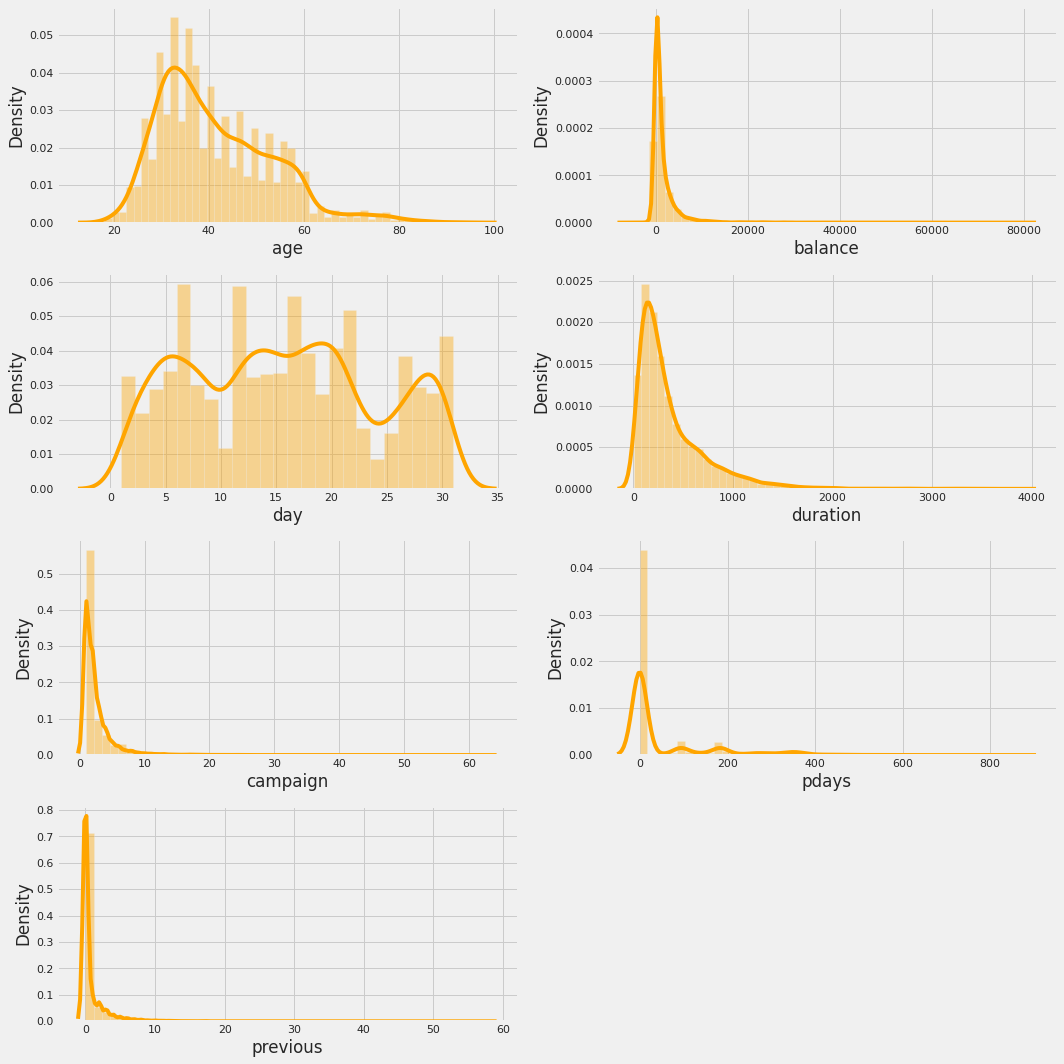

In [ ]:
# distribution plot for numerical data

plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)):
    plt.subplot(4, 2,i+1)
    sns.distplot(df[numericals[i]], color='orange')
    plt.tight_layout()

Dari pengamatan Dist Plot:

semua kolom tampaknya memiliki distribusi miring positif, kolom DAY tanpak seperti memiliki distribusi simetris namun jika dilihat pada satistik deskriftif day menunjukkan miring positif (skewed positif).

## Multivariate Analysis

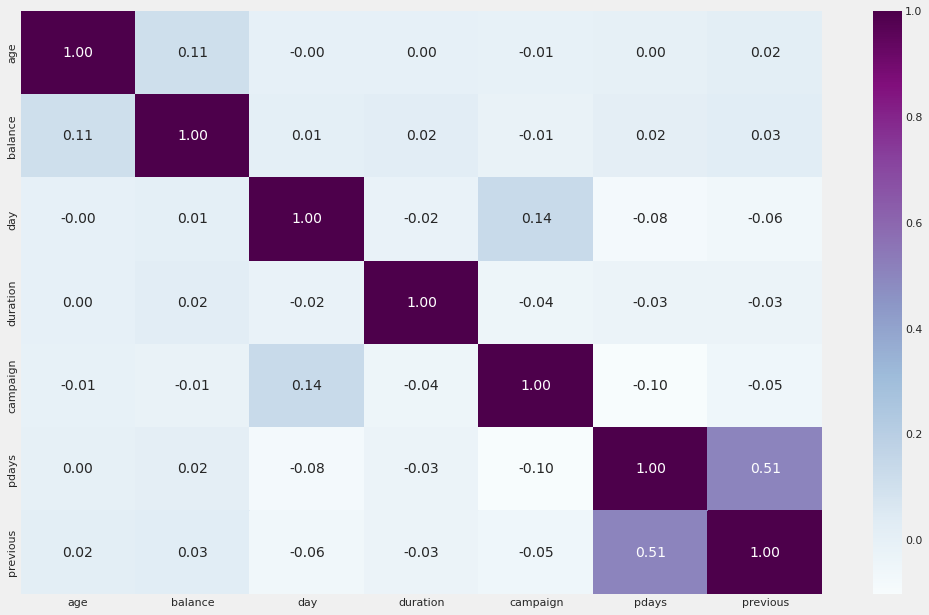

In [ ]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

hubungan antar variabel tidak lebih dari 51 % menunjukkan kecil kemungkinan multikoliniearitas

hubungan deposit dan campaign adalah terbalik, dimana semakin campaign (semakin banyak dihubungi) maka peluang pelanggan melakukan term deposit semakin mengecil, caranya deposit dijadikan 1 dan 0 dulu baru liat hasil korelasi yg baru

<Figure size 1152x720 with 0 Axes>

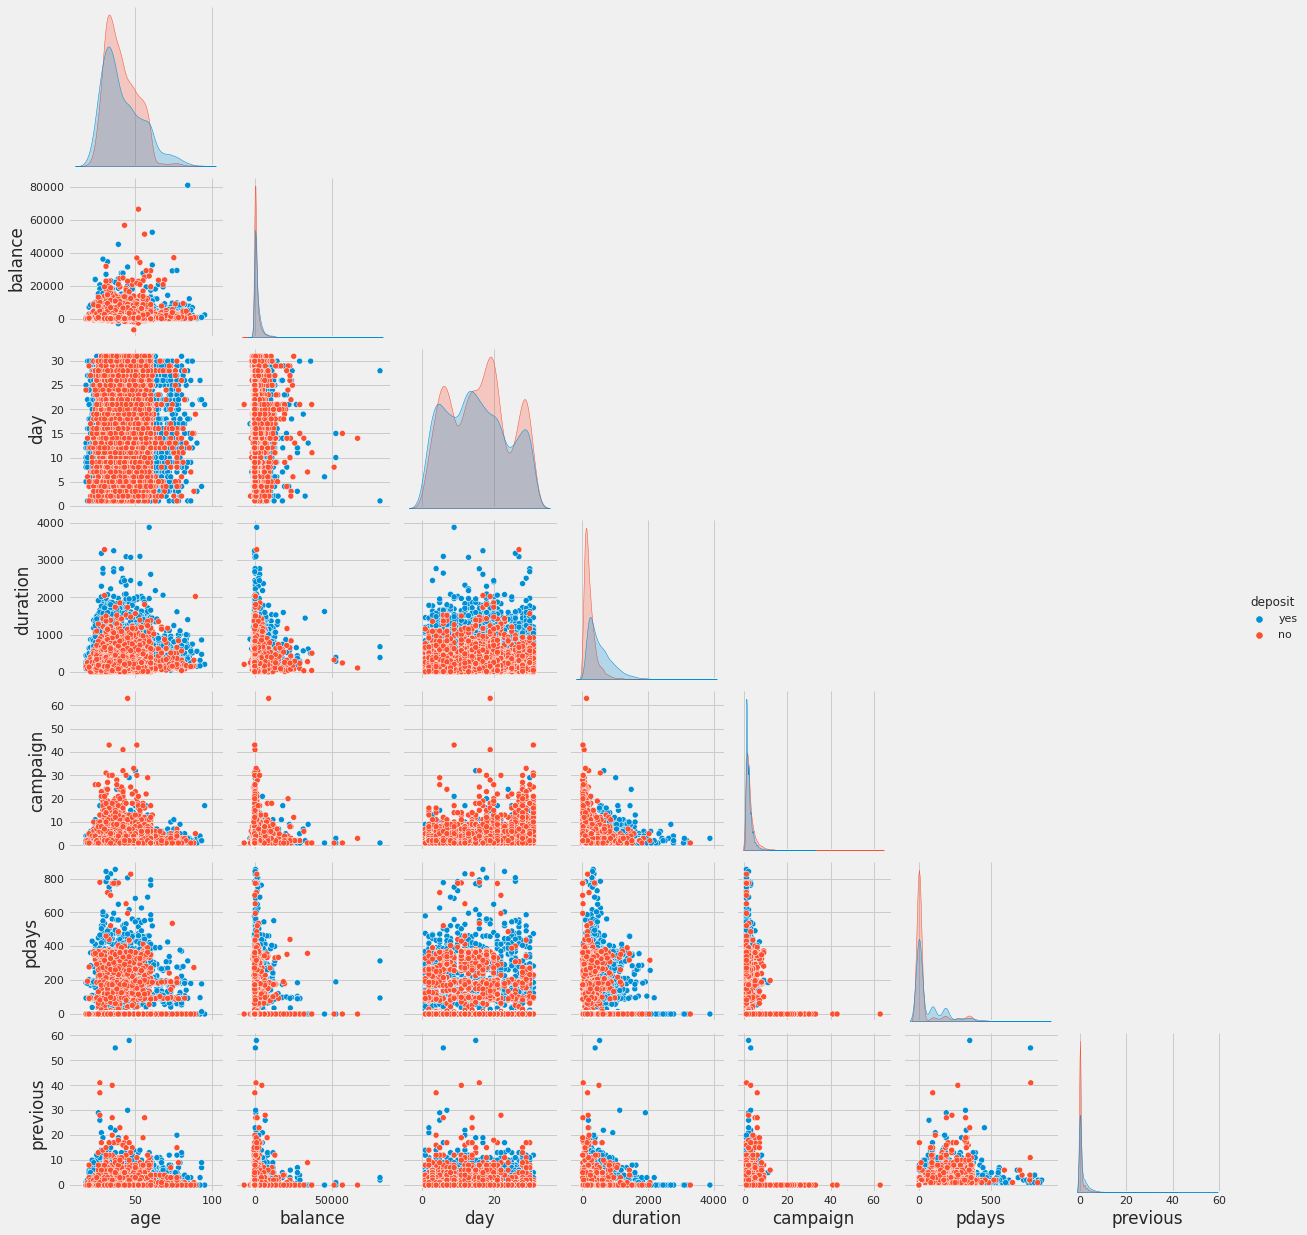

In [ ]:
plt.figure(figsize=(16,10))
sns.pairplot(df,hue='deposit',corner=True)

sekilas terlihat pada beberpa fitur lebih banyak yang tidak melakukan term deposit

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

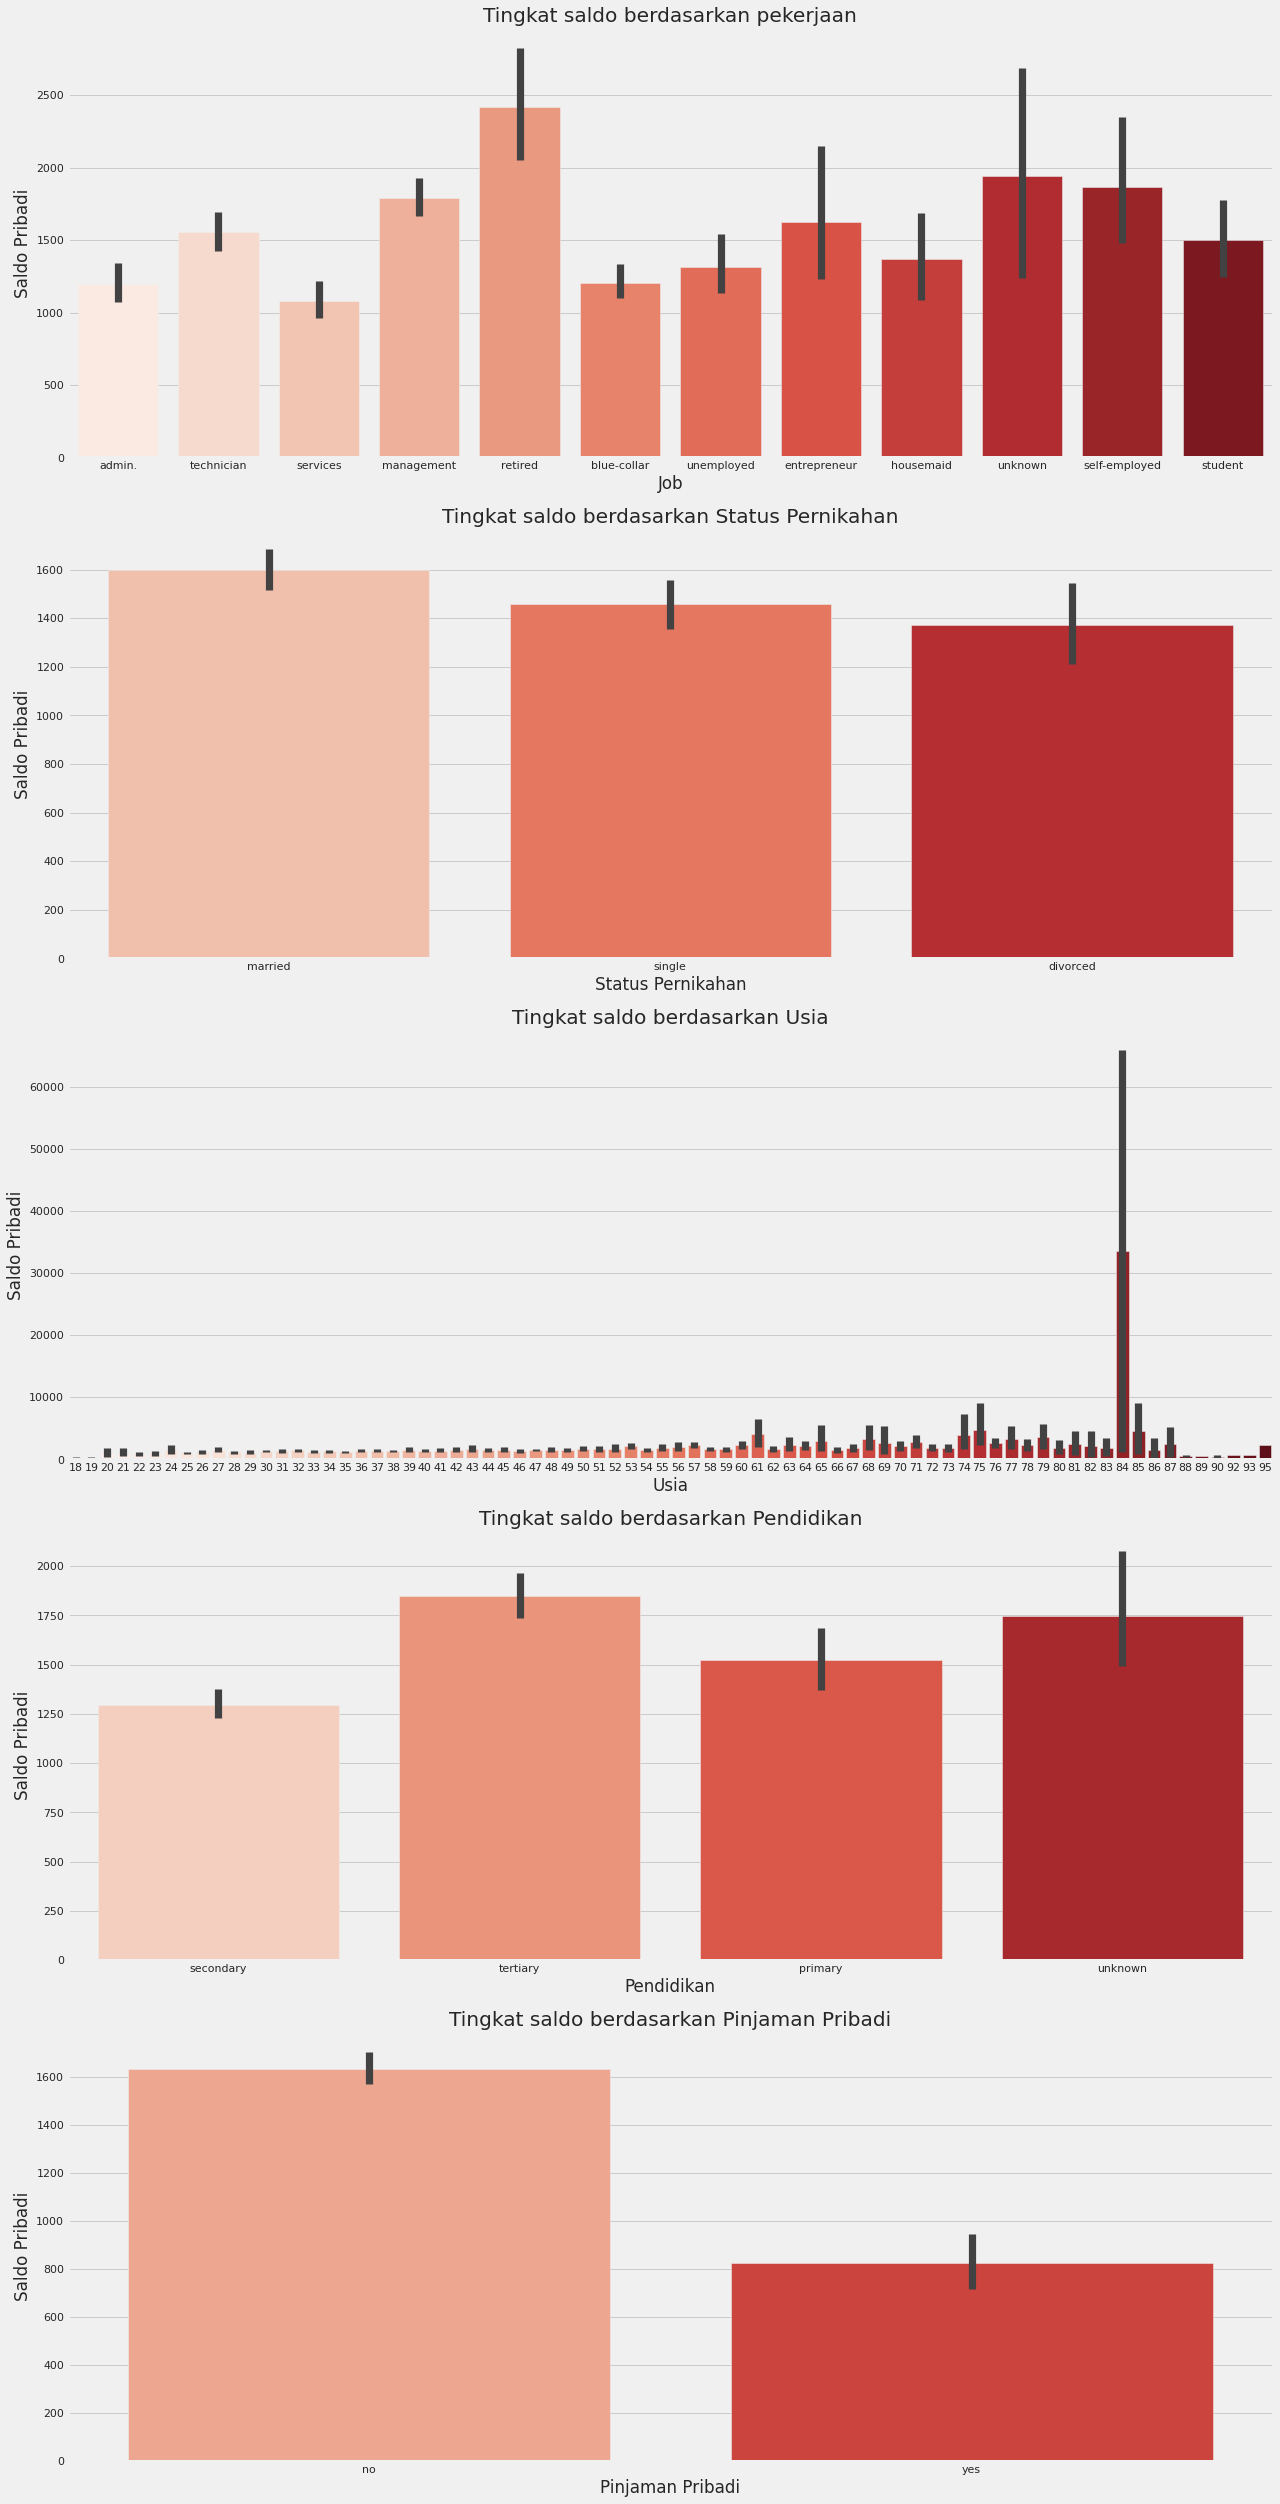

In [ ]:
cat_feature = df.columns

f,ax = plt.subplots(5,figsize=(18,35))

g = sns.barplot(x='job', y='balance', data=df , palette='Reds' ,ax=ax[0])
ax[0].set_title('Tingkat saldo berdasarkan pekerjaan')
ax[0].set_xlabel('Job')
ax[0].set_ylabel('Saldo Pribadi')

g = sns.barplot(x='marital', y='balance', data=df , palette='Reds' ,ax=ax[1])
ax[1].set_title('Tingkat saldo berdasarkan Status Pernikahan')
ax[1].set_xlabel('Status Pernikahan')
ax[1].set_ylabel('Saldo Pribadi')


g = sns.barplot(x='age', y='balance', data=df , palette='Reds' ,ax=ax[2])
ax[2].set_title('Tingkat saldo berdasarkan Usia')
ax[2].set_xlabel('Usia')
ax[2].set_ylabel('Saldo Pribadi')

g = sns.barplot(x='education', y='balance', data=df , palette='Reds' ,ax=ax[3])
ax[3].set_title('Tingkat saldo berdasarkan Pendidikan')
ax[3].set_xlabel('Pendidikan')
ax[3].set_ylabel('Saldo Pribadi')


g = sns.barplot(x='loan', y='balance', data=df , palette='Reds' ,ax=ax[4])
ax[4].set_title('Tingkat saldo berdasarkan Pinjaman Pribadi')
ax[4].set_xlabel('Pinjaman Pribadi')
ax[4].set_ylabel('Saldo Pribadi')


plt.tight_layout()

# Data Preprocessing

## Missing Values

In [ ]:
data = df

In [ ]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage


Tidak ada mising value pada dataset, lanjut cek duplikat

## Duplicate Values

In [ ]:
data.duplicated().sum()

0

In [ ]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [ ]:
data = data.drop_duplicates()
data.shape

(11162, 17)

## Label Encoding

In [ ]:
df = data

In [ ]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'marital'.
df['marital']= label_encoder.fit_transform(df['marital'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['deposit']= label_encoder.fit_transform(df['deposit']) 
df['loan']= label_encoder.fit_transform(df['loan']) 
df['default']= label_encoder.fit_transform(df['default']) 



In [ ]:
rows = []
for col in df :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Unique Values':  df[col].unique()

        }
  )
# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=True).reset_index().drop('index', 1)


,Nama Kolom,Jumlah Unique Values,Unique Values
0,deposit,2,"[1, 0]"
1,loan,2,"[0, 1]"
2,housing,2,"[1, 0]"
3,default,2,"[0, 1]"
4,contact,3,"[unknown, cellular, telephone]"
5,marital,3,"[1, 2, 0]"
6,poutcome,4,"[unknown, other, failure, success]"
7,education,4,"[secondary, tertiary, primary, unknown]"
8,job,12,"[admin., technician, services, management, retired, blue-collar, u..."
9,month,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep]"


In [ ]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,1,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,1,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,1,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,1,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


## One Hot Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  int64 
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 1.5+ MB


In [ ]:
# lihat sekilas hasil One hot encode column 'job','education', 'contact', 'month', 'poutcome' dan definisikan ke one_hot_columns
one_hot_columns = pd.get_dummies(df[['job','education', 'contact', 'month', 'poutcome']])

#kode singkat dari kode di atas
# one_hot_columns = pd.get_dummies(object_columns)

In [ ]:
# kolom kolom yang berada dalam one_hot_columns   ingin di one hot encoding
dumies_one_hot_encod = one_hot_columns 

# bagian one hot encoding dari kolom Contract dan PaymenMethod
df_updated = pd.concat([df, dumies_one_hot_encod], axis = 1)

# # hapus kolom yang berada di dalam one_hot_columns  dari dataframe awal
df_updated.drop(['job','education', 'contact', 'month', 'poutcome'], axis = 1, inplace = True)

df_updated.head()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343,1,0,5,1042,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,56,1,0,45,0,0,5,1467,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,41,1,0,1270,1,0,5,1389,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,55,1,0,2476,1,0,5,579,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,54,1,0,184,0,0,5,673,2,-1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11161
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   marital              11162 non-null  int64
 2   default              11162 non-null  int64
 3   balance              11162 non-null  int64
 4   housing              11162 non-null  int64
 5   loan                 11162 non-null  int64
 6   day                  11162 non-null  int64
 7   duration             11162 non-null  int64
 8   campaign             11162 non-null  int64
 9   pdays                11162 non-null  int64
 10  previous             11162 non-null  int64
 11  deposit              11162 non-null  int64
 12  job_admin.           11162 non-null  uint8
 13  job_blue-collar      11162 non-null  uint8
 14  job_entrepreneur     11162 non-null  uint8
 15  job_housemaid        11162 non-null  uint8
 16  job_management       1

In [ ]:
df_updated.head(5)

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343,1,0,5,1042,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,56,1,0,45,0,0,5,1467,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,41,1,0,1270,1,0,5,1389,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,55,1,0,2476,1,0,5,579,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,54,1,0,184,0,0,5,673,2,-1,...,0,0,1,0,0,0,0,0,0,1


# Copy The Dataset

In [ ]:
databaseline = df_updated.copy()

# Baseline Model

In [ ]:
# It's important to choose the right metric when doing classification
x = databaseline['deposit'].value_counts()
print(x)

0    5873
1    5289
Name: deposit, dtype: int64


In [ ]:
persen1 = x[0]/(x[0] + x[1]) * 100
persen2 = x[1]/(x[0] + x[1]) * 100
print(persen1,'dan', persen2)

52.61601863465329 dan 47.38398136534671


## SMOTE method

In [ ]:
# Smote/K-means smote

In [ ]:
from imblearn import under_sampling, over_sampling

X = df_updated.drop(['deposit'],axis=1)
y = df_updated['deposit']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
df_oversampling_baseline_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
df_oversampling_baseline_smote.head(3)

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,1,0,2343,1,0,5,1042,1,-1,...,0,1,0,0,0,0,0,0,1,1
1,56,1,0,45,0,0,5,1467,1,-1,...,0,1,0,0,0,0,0,0,1,1
2,41,1,0,1270,1,0,5,1389,1,-1,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
x = df_oversampling_baseline_smote['deposit'].value_counts()
persen1 = x[0]/(x[0] + x[1]) * 100
persen2 = x[1]/(x[0] + x[1]) * 100
print(persen1,'dan', persen2)

50.0 dan 50.0


In [ ]:
print(df_updated.shape)
print(df_oversampling_baseline_smote.shape)
databaseline = df_oversampling_baseline_smote

(11162, 47)
(11746, 47)


In [ ]:
X = databaseline.drop('deposit', axis=1)
y = databaseline['deposit']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

## KNN

### Fit - Train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Predict

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
baseline_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Akurasi',baseline_accuracy_knn)

Akurasi 0.7505675368898979


### Evaluation

## Logistic Regression

### Fit (Training)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Predict

In [ ]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([1, 0, 0, ..., 1, 0, 1])

### Evaluation

In [ ]:
baseline_accuracy_logistic_regression = accuracy_score(y_test, y_pred_reg)
print('Akurasi',baseline_accuracy_logistic_regression)

Akurasi 0.8050510783200908


## Decission Tree

### Fit - Train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

### Predict

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 1, ..., 1, 0, 1])

### Evaluation

In [ ]:
baseline_accuracy_decission_tree = accuracy_score(y_test, y_pred_dt)
print('Akurasi',baseline_accuracy_decission_tree)

Akurasi 0.7908626560726447


## Random Forest

### Fit - Train

In [ ]:
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(random_state=42)
dt.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Predict

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 0, ..., 1, 0, 1])

### Evaluation

In [ ]:
baseline_accuracy_random_forest = accuracy_score(y_test, y_pred_dt)
print('Akurasi',baseline_accuracy_random_forest)

Akurasi 0.8575482406356413


## XgBoost Classifier

### Fit - Train

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

### Predict

In [ ]:
y_pred_xgb_model = xgb_model.predict(X_test)
y_pred_xgb_model

array([1, 0, 0, ..., 1, 0, 1])

### Evaluation

In [ ]:
baseline_accuracy_xgb_model = accuracy_score(y_test, y_pred_dt)
print('Akurasi',baseline_accuracy_xgb_model)

Akurasi 0.8575482406356413


# Model Selection for Tuning

In [ ]:
print('baseline_accuracy_knn', '\t\t\t:',baseline_accuracy_knn)
print('baseline_accuracy_decission_tree', '\t:',baseline_accuracy_decission_tree)
print('baseline_accuracy_logistic_regression', '\t:',baseline_accuracy_logistic_regression)
print('baseline_accuracy_random_forest', '\t:',baseline_accuracy_random_forest)
print('baseline_accuracy_xgb_model', '\t\t:',baseline_accuracy_xgb_model)

baseline_accuracy_knn 			: 0.7505675368898979
baseline_accuracy_decission_tree 	: 0.7908626560726447
baseline_accuracy_logistic_regression 	: 0.8050510783200908
baseline_accuracy_random_forest 	: 0.8575482406356413
baseline_accuracy_xgb_model 		: 0.8575482406356413


berdasarkan Baseline Model, akurasi tertinggi diperoleh oleh model Random Forest, maka akan dipilih Random Forest Modeluntuk di Hyperparametertuning dan Cross Validation!. 

# Choose the appropriate metric for fitting the model

In [ ]:
# It's important to choose the right metric when doing classification
x = df_updated['deposit'].value_counts()
persen1 = x[0]/(x[0] + x[1]) * 100
persen2 = x[1]/(x[0] + x[1]) * 100
print('DISTRIBUSI DATA TARGET', persen1,'dan', persen2)

DISTRIBUSI DATA TARGET 52.61601863465329 dan 47.38398136534671


observasi ⤵
DISTRIBUSI dapat dianggap dlm rentang BALANCE (45% minimal), namun tetap saya lakukan metode SMOTE untuk mendapatkan distribusi yg 50% 50% (Full Balance) ,saat ini saya akan menggunakan AUC, dikarenakan metric AUC dapat diterapkan pada target balance dan imbalance.

# Penentuan Metrik



*   Akurasi
*   - Evaluasi ketika memiliki balanced data

*   Precision
*   - Biasa digunakan ketika lebih memperhatikan jumlah False positif (FP) yang sebaiknya lebih sedikit.
*   - Contoh kasus : deteksi spam pada email

*   Recall
*   - Jika kita tidak memperbolehkan nilai False Negatif (FN) yang besar
*   - Contoh kasus : Deteksi penyakit kanker

*   F1 score 
*   - merangkum precision dan  recall dengan mengambil RATAAN HARMONIK dari keduanya
*   - F1 score dapat diterapkan pada data imbalance


*   AUC 
*   - mirip akurasi tapi dapat dapat diterapkan pada data imbalance




# SMOTE method

In [ ]:
# Smote/K-means smote

In [ ]:
from imblearn import under_sampling, over_sampling

X = df_updated.drop(['deposit'],axis=1)
y = df_updated['deposit']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
df_oversampling_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
df_oversampling_smote.head(3)

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,1,0,2343,1,0,5,1042,1,-1,...,0,1,0,0,0,0,0,0,1,1
1,56,1,0,45,0,0,5,1467,1,-1,...,0,1,0,0,0,0,0,0,1,1
2,41,1,0,1270,1,0,5,1389,1,-1,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
x = df_oversampling_smote['deposit'].value_counts()
persen1 = x[0]/(x[0] + x[1]) * 100
persen2 = x[1]/(x[0] + x[1]) * 100
print('DISTRIBUSI DATA TARGET', persen1,'dan', persen2)
if persen1 == persen2:
  print('Distribusi Target Balance !')
else:
  print('Distribusi Target Tidak Balance!')

DISTRIBUSI DATA TARGET 50.0 dan 50.0
Distribusi Target Balance !


In [ ]:
df_oversampling_smote.shape

(11746, 47)

In [ ]:
df_updated.shape

(11162, 47)

karena sebelumnya distribusi berada pada pengecekan distribusi menghasilkan DISTRIBUSI DATA TARGET 52.61601863465329 dan 47.38398136534671, maka tetap menggunakan df_updated karena masih dalam rentang balance terlebih lagi merupakan data asli.

# Random Forest Hyperparametertuning with Random Search Cross Validation (RandomsearchCV)

solusi ketika ketika tidak melakukan pemisahan data menjadi Train-Validation-Test Dataset adalah dengan melakukan Cross Validation, dimana melakukan validation tanpa perlu memerlukan validation set terpisah. dataset tetap dibagi menjadi train dan test set, cross validation dilakukan pada train set, GridSearchCV & RandomSearchCV, saya menggunakan 5 sebagai K-Fold cros validation, terlebih lagi dataset yg saya gunakan tergolong tidak besar(tidak sampai jutaan), maka dari itu penggunaan cross validation masih dapat digunakan karena dataset saya kecil ukurannya, jika digunakan pada dataset yg jutaan akan memakan waktu yg sangat lama dan tidak bijak digunakan pada dataset besar. jika dataset besar hingga jutaan disarankan untuk menggunakan skema hyperparametertuning yg biasa (Train-validation-Test)
</br>Hyperparametertuning untuk menghindari overfit

sumber grid Search CV [link text](https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/#:~:text=Cross-Validation%20and%20GridSearchCV,-In%20GridSearchCV%2C%20along&text=Cross-Validation%20is%20used%20while,data%20and%20the%20validation%20data.)

## Random Forest

In [ ]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = df_updated.drop(columns='deposit').to_numpy()
y = df_updated[['deposit']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    # 'max_depth':(1,2,3,4,5)
    'max_depth':list(range(10, 15))

}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='accuracy')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 29.5 s, sys: 98.4 ms, total: 29.6 s
Wall time: 29.5 s


menggunakan GridSearchCv secara utuh membutuhkan waktu > 13.8 seconds to finish

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 14, 'n_estimators': 50}",0.856871,1
23,"{'max_depth': 14, 'n_estimators': 40}",0.856199,2
22,"{'max_depth': 14, 'n_estimators': 30}",0.855527,3
19,"{'max_depth': 13, 'n_estimators': 50}",0.854519,4
18,"{'max_depth': 13, 'n_estimators': 40}",0.852952,5
17,"{'max_depth': 13, 'n_estimators': 30}",0.852951,6
9,"{'max_depth': 11, 'n_estimators': 50}",0.852503,7
8,"{'max_depth': 11, 'n_estimators': 40}",0.852391,8
14,"{'max_depth': 12, 'n_estimators': 50}",0.851831,9
6,"{'max_depth': 11, 'n_estimators': 20}",0.851383,10


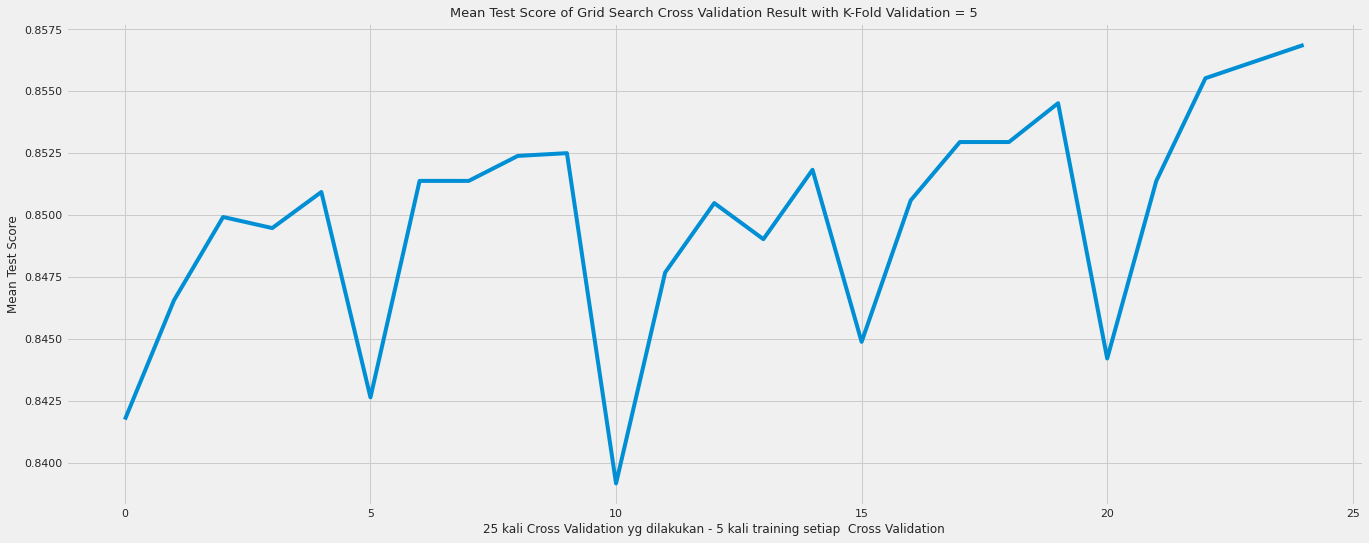

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# creating a DataFrame with 2 columns
a = cv_result['mean_test_score'].tolist()
dataFrame = pd.DataFrame(
   {
      'mean_test_score': a
   }
)

# plot a line graph
plt.plot(dataFrame["mean_test_score"])
# plt.ylim(160, 180)
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['axes.titlesize'] = (13)
# displaying the title
plt.title("Mean Test Score of Grid Search Cross Validation Result with K-Fold Validation = 5")
plt.ylabel("Mean Test Score", fontsize=12)
plt.xlabel("25 kali Cross Validation yg dilakukan - 5 kali training setiap  Cross Validation", fontsize=12)
# plt.ylim(0, 1)
plt.show()

If we want to speed up the training process, we may use RandomizedSearchCV

In [ ]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    # 'max_depth':(1,2,3,4,5)
    'max_depth':list(range(10, 15))
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='accuracy', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 11.8 s, sys: 56.3 ms, total: 11.9 s
Wall time: 12.5 s


In [ ]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
9,"{'n_estimators': 40, 'max_depth': 14}",0.856199,1
2,"{'n_estimators': 40, 'max_depth': 13}",0.852952,2
6,"{'n_estimators': 40, 'max_depth': 11}",0.852391,3
3,"{'n_estimators': 20, 'max_depth': 14}",0.851383,4
7,"{'n_estimators': 20, 'max_depth': 13}",0.850599,5
4,"{'n_estimators': 30, 'max_depth': 10}",0.849927,6
1,"{'n_estimators': 40, 'max_depth': 10}",0.849479,7
5,"{'n_estimators': 40, 'max_depth': 12}",0.849032,8
0,"{'n_estimators': 20, 'max_depth': 12}",0.847687,9
8,"{'n_estimators': 10, 'max_depth': 10}",0.841750,10


Observasi :</br>

menggunakan RandomSearchCV mean_test_score biasanya akan berkurang, tetap saya anggap lebih baik menggunakan RandomSearchCv karena akan menghemat waktu perhitungan/computasi dan biaya operasional nantinya

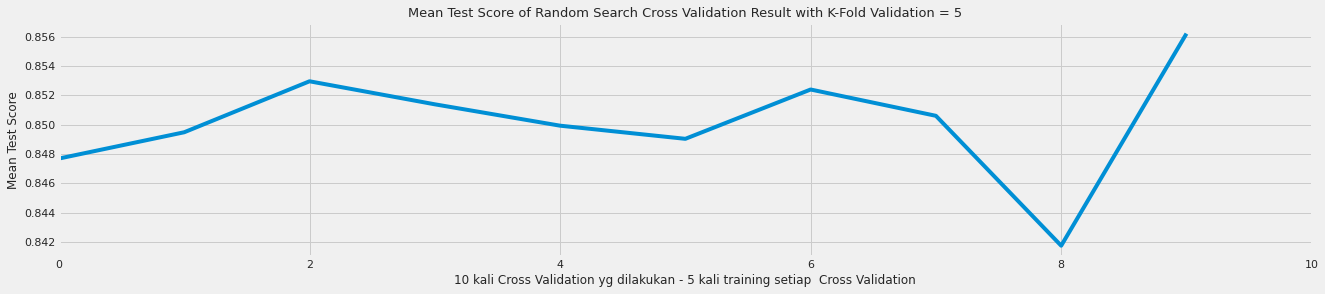

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# creating a DataFrame with 2 columns
a = cv_result['mean_test_score'].tolist()
dataFrame = pd.DataFrame(
   {
      'mean_test_score': a
   }
)

# plot a line graph
plt.plot(dataFrame["mean_test_score"])
# plt.ylim(160, 180)
plt.rcParams["figure.figsize"] = (8,3)
plt.rcParams['axes.titlesize'] = (13)
# displaying the title
plt.title("Mean Test Score of Random Search Cross Validation Result with K-Fold Validation = 5")
plt.ylabel("Mean Test Score", fontsize=12)
plt.xlabel("10 kali Cross Validation yg dilakukan - 5 kali training setiap  Cross Validation", fontsize=12)

plt.xlim(0, 10)
plt.show()

### Evaluate the model on test data

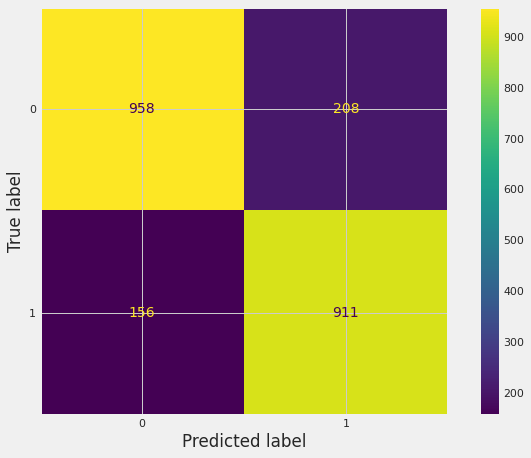

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
print('Observasi : ')
print('sebanyak', confusion_matrix(y_test, y_pred)[0,1],'diprediksi deposit tapi sebenarnya tidak deposit')
print('sebanyak', confusion_matrix(y_test, y_pred)[1,0],'diprediksi tidak deposit tapi sebenarnya deposit')
print()
print('dengan kata lain,')
print()
print('true positif/berhasil memprediksi deposit = ',confusion_matrix(y_test, y_pred)[1,1])
print('true negatif/berhasil memprediksi tidak deposit = ',confusion_matrix(y_test, y_pred)[0,0])
print('false positif/deposit yg tidak berhasil diprediksi = ',confusion_matrix(y_test, y_pred)[1,0])
print('false negatif/tidak deposit yg tidak berhasil diprediksi = ',confusion_matrix(y_test, y_pred)[0,1])

Observasi : 
sebanyak 208 diprediksi deposit tapi sebenarnya tidak deposit
sebanyak 156 diprediksi tidak deposit tapi sebenarnya deposit

dengan kata lain,

true positif/berhasil memprediksi deposit =  911
true negatif/berhasil memprediksi tidak deposit =  958
false positif/deposit yg tidak berhasil diprediksi =  156
false negatif/tidak deposit yg tidak berhasil diprediksi =  208


In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy \t: %.2f' % accuracy_score(y_test, y_pred))
print('Precision \t: %.2f' % precision_score(y_test, y_pred))
print('Recall \t\t: %.2f' % recall_score(y_test, y_pred))
print('specificity \t: %.2f' % recall_score(y_test, y_pred, pos_label=0))
print('F1 Score \t: %.2f' % f1_score(y_test, y_pred))

Accuracy 	: 0.84
Precision 	: 0.81
Recall 		: 0.85
specificity 	: 0.82
F1 Score 	: 0.83


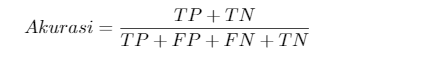

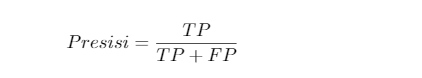

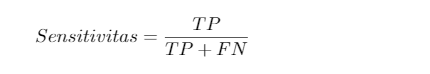

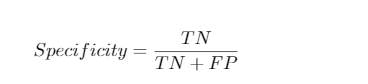

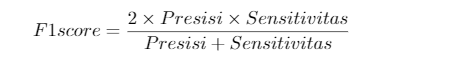

# Estimasi Potential Impact

In [ ]:
deposit = len(df_updated[df_updated['deposit'] == 1])
undeposit = len(df_updated[df_updated['deposit'] == 0])
campaignmax = df_updated['campaign'].max()
campaignsum = df_updated.loc[df_updated["campaign"] > 0, "campaign"].sum()
campaignmean = (df_updated.loc[df_updated["campaign"] > 0, "campaign"].sum())/len(df['campaign'])
campaignmean = float(campaignmean)
campaignmean = round(campaignmean,)
sepuluhpersen = round(float((10/100)*deposit),)

ccost = 25000
a = accuracy_score(y_test, y_pred)
a = float(a)
a = round(a,2)
b = (a - 1)*-1
b = round(b,2)

print('total orang yang melakukan dan tidak melakukan deposit berdasarkan dataset sebanyak',deposit + undeposit)
print('orang yang melakukan deposit berdasarkan dataset sebanyak',deposit)
print('orang yang melakukan tidak deposit berdasarkan dataset sebanyak',undeposit)
print('10 persen dari orang yang melakukan deposit sebanyak',sepuluhpersen)
print('dihubungi paling sering per orang sebanyak ', campaignmax,'kali')
print('total orang campaign sebanyak', campaignsum, 'kali')
print('rata-rata menghubungi sebanyak', campaignmean,'kali')
print()
print('akurasi model sebanyak',a, 'persen maka : ')
print('dapat menghemat biaya campaign sebanyak',b,'persen, karena akan fokus campaign ke',a,'persen saja')
print()
print('Misalkan campaign dilakukan pada 10 persen pelanggan yg melakukan deposit sebelumnya.')
print('jika diasumsikan biaya setiap sekali campaign(iklan google/yt/facebook/call/etc) = Rp.',ccost)
print('karena sebelumya model mendapatkan',a,'akurasi', 'maka : ')
print(a,'persen dari' ,sepuluhpersen, 'orang yg melakukan deposit ialah', (sepuluhpersen/100)*(a*100),'orang')
print('rata-rata setiap orang dihubungi sebanyak',campaignmean, 'dikalikan dengan ', (sepuluhpersen/100)*(a*100))
print('anggaran campaign yg dikeluarkan menjadi Rp.',round(campaignmean * (sepuluhpersen/100)*(a*100) * ccost,),'dan menghemat sebesar Rp. ', round(ccost * (sepuluhpersen - (sepuluhpersen/100)*(a*100)) * campaignmean,))


# diasumsikan harga telepon permenit telkom di asumsikan skitar 1100/menit utk jarak 30-200km, 
# berdasarkan riset beberapa website 
# https://harga.web.id/info-tarif-telepon-rumah-telkom-2015.info
# include biaya lainnya



total orang yang melakukan dan tidak melakukan deposit berdasarkan dataset sebanyak 11162
orang yang melakukan deposit berdasarkan dataset sebanyak 5289
orang yang melakukan tidak deposit berdasarkan dataset sebanyak 5873
10 persen dari orang yang melakukan deposit sebanyak 529
dihubungi paling sering per orang sebanyak  63 kali
total orang campaign sebanyak 27999 kali
rata-rata menghubungi sebanyak 3 kali

akurasi model sebanyak 0.84 persen maka : 
dapat menghemat biaya campaign sebanyak 0.16 persen, karena akan fokus campaign ke 0.84 persen saja

Misalkan campaign dilakukan pada 10 persen pelanggan yg melakukan deposit sebelumnya.
jika diasumsikan biaya setiap sekali campaign(iklan google/yt/facebook/call/etc) = Rp. 25000
karena sebelumya model mendapatkan 0.84 akurasi maka : 
0.84 persen dari 529 orang yg melakukan deposit ialah 444.36 orang
rata-rata setiap orang dihubungi sebanyak 3 dikalikan dengan  444.36
anggaran campaign yg dikeluarkan menjadi Rp. 33327000 dan menghemat sebesa

#Kesimpulan</br>
*   model terbaik  Random Forest, karena  model ini memiliki accuracy paling tinggi di baseline model sehingga dipilih untuk di tuning.</br>

*   sehingga dengan model yang lebih peka terhadap orang yang akan melakukan term deposit maka kampanye marketing dapat lebih maksimal dilakukan  dengan mendekati orang-orang yang memiliki kriteria atau cendrung melakukan term deposit dgn berbagai metode marketing yang sesuai.</br> 

*   namun untuk perhitungan yang lebih cepat sebaiknya saya melakukan data scaling dan Hypertuning RandomSearchCV dibandingkan menggunakan GridSeearchCV agar beban perhitungan lebih murah.</br>

*   penulis  meilih menggunakan model yg dapat menghandle outlier, seperti knn, random forest, decision tree dll, untuk metode penghapusan outlier penulis rasa kurang tepat dilakukan karena dataset yg digunakan akan berkurang sangat bnyak nantinya.


# Rekomendasi

Tujuan rekomendasinya untuk menghemat biaya iklan/campaign ke pelanggan dan meningkatkan pelanggan yg melakukan/langganan Deposito/Term Deposit



1.   mengunakan model untuk membuat list pelanggan potensial yg mau melakukan term deposit/deposito, sehingga marketing dept dapat langsung melakukan campaign ke pelanggan yg potensial agar menghemat biaya campaign.
2.   membuat panduan umum untuk marketing dept yg berisikan Kriteria khusus yg dapat membuat pelanggan menjadi tidak tertarik atau sebaliknya untuk melakukan term deposit/deposito berdasarkan beberapa fakta yg ditemukan dari data, maka pertimbangkan beberapa hal sebagai berikut untuk membuat panduan umum:</br>
  *   Pertimbangkan untuk malakukan kampanye pada usia 30 an.
  *   Pertimbangkan untuk malakukan kampanye pada pasangan yang tidak bercerai.
  *   Pertimbangkan untuk melakukan kampanye pada pelanggan yang tidak memiliki Loans(Pinjaman) serta menghindari pelanggan yg memiliki pinjaman.</br>
  *   Pertimbangkan untuk melihat tingkat saldo pada setiap profesi, usahakan untuk lebih banyak mendekati pelanggan yg bekerja di rana management.</br>
  *   Tidak disarankan untuk campaign (menghubungi) pelanggan terlalu sering, karena semakin banyak menghubungi(melakukan kampanye/iklan) kepada pelanggan maka kesempatan utk pelanggan tersebut melakukan term deposit semakin mengecil.



